In [1]:
import pickle
import numpy as np

all_result=[]
for seed in [111,222,333,444,555]:
    # Replace with your actual file path
    file_path = f"{seed}/result.pkl"

    with open(file_path, "rb") as f:
        data = pickle.load(f)
    all_result.append(data)
res=np.array([np.sqrt(np.mean(np.array([x[1] for x in y])**2,1))  for y in all_result])

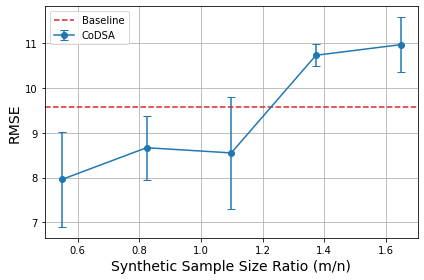

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Your array
arr = res[:,1:]

# Compute mean and std over repeats (axis=0)
mean_vals = np.mean(arr, axis=0)  # shape: (6,)
std_vals = np.std(arr, axis=0)    # shape: (6,)

# Define x-axis (m/n values)
x_mn = (np.array([10000, 15000, 20000, 25000, 30000]) ) / (18205)  # or replace with actual m/n values like [0.1, 0.2, ..., 0.6]

# Plot
plt.figure(figsize=(6, 4))
plt.errorbar(x_mn, mean_vals, yerr=std_vals,
             fmt='o-', color='tab:blue', label='CoDSA', ecolor='tab:blue',
             elinewidth=1.5, capsize=4, markersize=6)
plt.axhline(y=np.mean(res,0)[0], color='tab:red', linestyle='--', label='Baseline')

plt.xlabel('Synthetic Sample Size Ratio (m/n)', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("da_face_new.png", dpi=300)
plt.show()